In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('50_startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [6]:
df = pd.get_dummies(df,["State"])
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


<AxesSubplot:>

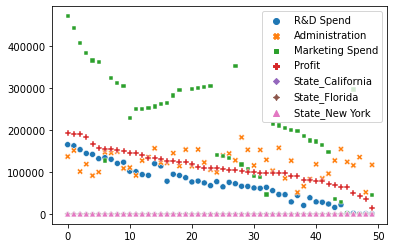

In [7]:
sns.scatterplot(data=df)

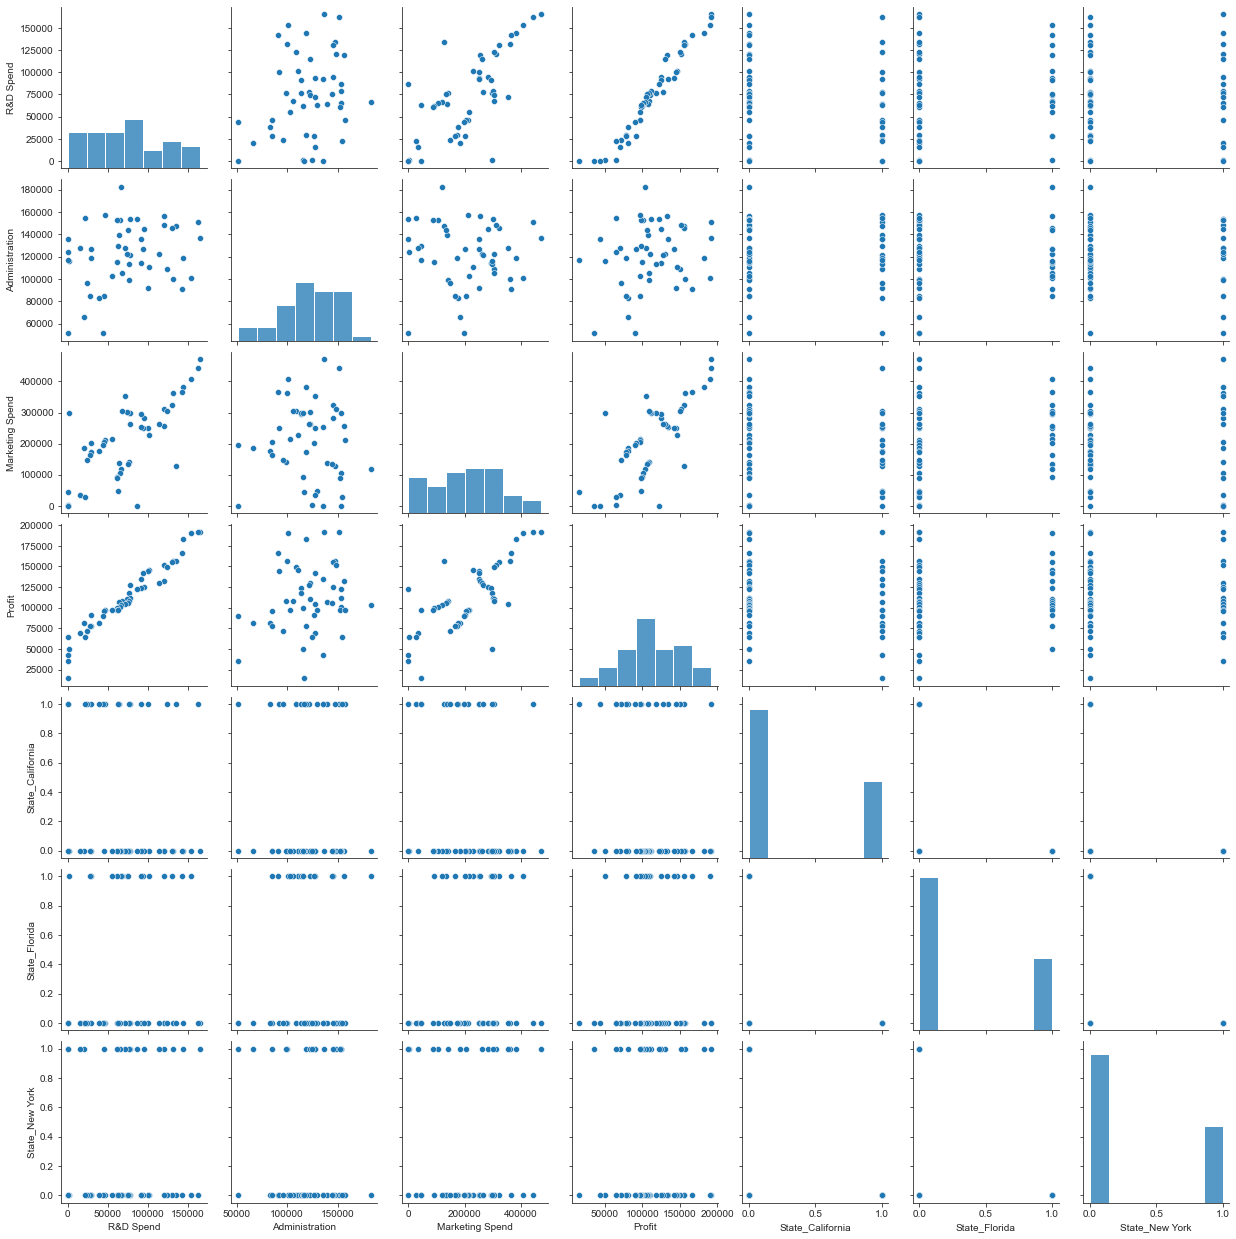

In [8]:
sns.set_style(style='ticks')
sns.pairplot(df)

In [9]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


we noticed the state_new_York they have very low correletion value so we drop this column

In [10]:
df = df.drop("State_New York",axis=1)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1


In [11]:
df1=df.rename({"R&D Spend":"rd",
                   "Administration":"admin",
                   "Marketing Spend":"ms","State_California":"sc","State_Florida":"sf"},axis=1)
df1.head()

,rd,admin,ms,Profit,sc,sf
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1


In [12]:
df1.corr()

,rd,admin,ms,Profit,sc,sf
rd,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711
admin,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493
ms,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244
sc,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366
sf,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000


In [13]:
import statsmodels.formula.api as smf
model=smf.ols("Profit~rd+admin+ms+sc+sf",data=df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           1.34e-27
Time:                        16:25:35   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
rd             0.8060      0.046     17.369      0.000       0.712       0.900
admin         -0.0270      0.052     -0.517      0.608      -0.132       0.078
ms             0.0270      0.017      1.574      0.123      -0.008       0.062
sc            41.8870   3256.039      0.013      0.990   -6520.229    6604.003
sf           240.6758   3338.857      0.072      0.943   -6488.349    6969.701
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculating VIF

In [14]:
rsq_rd = smf.ols('rd~admin+ms+sc+sf',data=df1).fit().rsquared
vif_rd = 1/(1-rsq_rd)

rsq_admin = smf.ols('admin~rd+ms+sc+sf',data=df1).fit().rsquared
vif_admin = 1/(1-rsq_admin)

rsq_ms = smf.ols('ms~admin+rd+sc+sf',data=df1).fit().rsquared
vif_ms = 1/(1-rsq_ms)

rsq_sc = smf.ols("sc~admin+rd+ms+sf",data=df1).fit().rsquared
vif_sc = 1/(1-rsq_sc)

rsq_sf = smf.ols("sf~admin+rd+ms+sc",data=df1).fit().rsquared
vif_sf = 1/(1-rsq_sf)

In [15]:
d1={'variables':['rd','admin','ms',"sc","sf"],
    'vif':[vif_rd,vif_admin,vif_ms,vif_sc,vif_sf]}

vif=pd.DataFrame(d1)
vif

,variables,vif
0,rd,2.495511
1,admin,1.177766
2,ms,2.416797
3,sc,1.335061
4,sf,1.361299


the vif values is small so no probleam so lets check the if data has any influential value

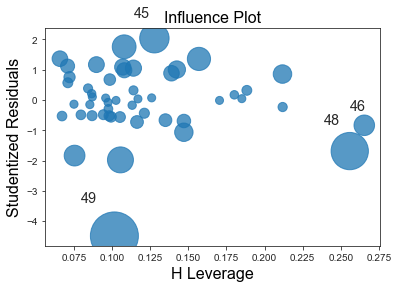

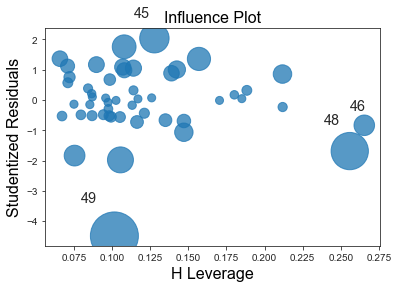

In [16]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)

index 49 is showing high influence so we can exclude this entire row

In [17]:
df2 = df1.drop(df1.index[49],axis=0)
df2.tail(5)

,rd,admin,ms,Profit,sc,sf
44,22177.74,154806.14,28334.72,65200.33,1,0
45,1000.23,124153.04,1903.93,64926.08,0,0
46,1315.46,115816.21,297114.46,49490.75,0,1
47,0.00,135426.92,0.00,42559.73,1,0
48,542.05,51743.15,0.00,35673.41,0,0


In [18]:
m1=smf.ols("Profit~admin+rd+ms+sc+sf",data=df2).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     216.6
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           2.51e-29
Time:                        16:25:35   Log-Likelihood:                -505.97
No. Observations:                  49   AIC:                             1024.
Df Residuals:                      43   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.143e+04   5812.919      8.847      0.000    3.97e+04    6.31e+04
admin         -0.0220      0.044     -0.505      0.616      -0.110       0.066
rd             0.7836      0.039     20.056      0.000       0.705       0.862
ms             0.0258      0.014      1.804      0.078      -0.003       0.055
sc          1954.0177   2751.932      0.710      0.482   -3595.783    7503.818
sf           389.7935   2788.050      0.140      0.889   -5232.845    6012.432
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.207
Skew:                           0.061   Prob(JB):                        0.902
Kurtosis:                       2.705   Cond. No.                     1.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

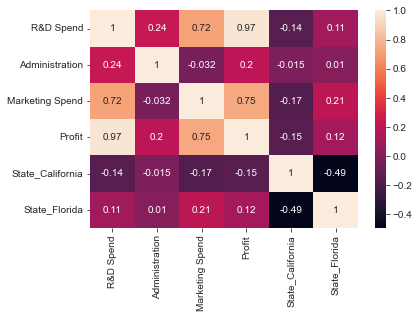

In [19]:
sns.heatmap(df.corr(), annot = True)

In [20]:
m2 = smf.ols('Profit~rd', df2).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1055.
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           7.56e-34
Time:                        16:25:36   Log-Likelihood:                -508.68
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      47   BIC:                             1025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.172e+04   2229.914     23.195      0.000    4.72e+04    5.62e+04
rd             0.8278      0.025     32.477      0.000       0.777       0.879
==============================================================================
Omnibus:                        0.070   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.203
Skew:                          -0.080   Prob(JB):                        0.903
Kurtosis:                       2.728   Cond. No.                     1.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
m3 =  smf.ols('Profit~ms', df2).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     56.66
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           1.30e-09
Time:                        16:25:36   Log-Likelihood:                -566.59
No. Observations:                  49   AIC:                             1137.
Df Residuals:                      47   BIC:                             1141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.406e+04   7601.574      8.428      0.000    4.88e+04    7.94e+04
ms             0.2329      0.031      7.527      0.000       0.171       0.295
==============================================================================
Omnibus:                        4.458   Durbin-Watson:                   1.140
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                4.096
Skew:                          -0.303   Prob(JB):                        0.129
Kurtosis:                       4.281   Cond. No.                     5.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
m4 = smf.ols('Profit~sc', df2).fit()
m4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.3281
Date:                Mon, 05 Dec 2022   Prob (F-statistic):              0.570
Time:                        16:25:36   Log-Likelihood:                -585.79
No. Observations:                  49   AIC:                             1176.
Df Residuals:                      47   BIC:                             1179.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.162e+05   6691.764     17.363      0.000    1.03e+05     1.3e+05
sc         -6707.5503   1.17e+04     -0.573      0.570   -3.03e+04    1.69e+04
==============================================================================
Omnibus:                        0.566   Durbin-Watson:                   0.036
Prob(Omnibus):                  0.753   Jarque-Bera (JB):                0.671
Skew:                           0.225   Prob(JB):                        0.715
Kurtosis:                       2.644   Cond. No.                         2.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
m5 = smf.ols('Profit~admin', df2).fit()
m5.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.080
Date:                Mon, 05 Dec 2022   Prob (F-statistic):              0.156
Time:                        16:25:36   Log-Likelihood:                -584.90
No. Observations:                  49   AIC:                             1174.
Df Residuals:                      47   BIC:                             1178.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.029e+04    2.4e+04      3.346      0.002     3.2e+04    1.29e+05
admin          0.2776      0.193      1.442      0.156      -0.110       0.665
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   0.084
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                1.052
Skew:                           0.310   Prob(JB):                        0.591
Kurtosis:                       2.639   Cond. No.                     5.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

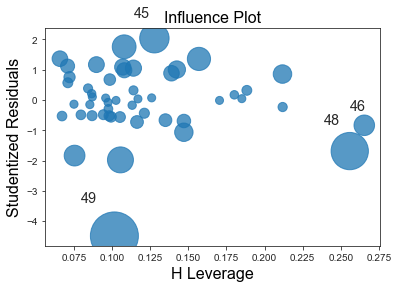

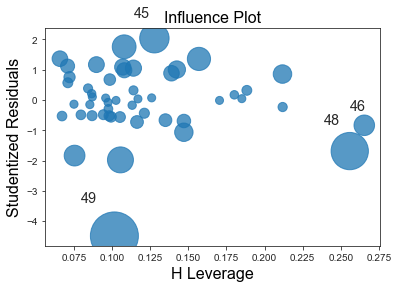

In [24]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)



In [25]:
df2 = df1.drop(df1.index[49],axis=0)
df2 


,rd,admin,ms,Profit,sc,sf
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1
5,131876.90,99814.71,362861.36,156991.12,0,0
6,134615.46,147198.87,127716.82,156122.51,1,0
7,130298.13,145530.06,323876.68,155752.60,0,1
8,120542.52,148718.95,311613.29,152211.77,0,0
9,123334.88,108679.17,304981.62,149759.96,1,0


In [26]:
m1=smf.ols("Profit~admin+rd+ms+sc+sf",data=df2).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     216.6
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           2.51e-29
Time:                        16:35:43   Log-Likelihood:                -505.97
No. Observations:                  49   AIC:                             1024.
Df Residuals:                      43   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.143e+04   5812.919      8.847      0.000    3.97e+04    6.31e+04
admin         -0.0220      0.044     -0.505      0.616      -0.110       0.066
rd             0.7836      0.039     20.056      0.000       0.705       0.862
ms             0.0258      0.014      1.804      0.078      -0.003       0.055
sc          1954.0177   2751.932      0.710      0.482   -3595.783    7503.818
sf           389.7935   2788.050      0.140      0.889   -5232.845    6012.432
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.207
Skew:                           0.061   Prob(JB):                        0.902
Kurtosis:                       2.705   Cond. No.                     1.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# residual analysis

In [27]:
res=m1.resid
res

0      2103.543815
1      2874.720587
2     10694.367621
3     11066.868378
4     -4423.099177
5     -4942.775088
6     -2796.090299
7     -3320.587404
8      1559.651080
9     -5744.777225
10    10967.282206
11     7567.444947
12    12572.633164
13     5303.686160
14   -16374.515563
15   -15306.706646
16     8335.604545
17    -4328.626135
18    -4542.513614
19     7014.838789
20      138.854192
21    -5890.450112
22    -4572.189923
23    -1539.378722
24    -4687.432233
25     2865.472822
26    -5395.474562
27    -9223.381138
28      681.678987
29    -1224.630972
30     -262.046827
31     -762.501777
32    -3982.146650
33    -1793.100995
34     4984.357361
35     5564.445851
36    14037.325081
37    -1920.986205
38    10620.728755
39    -5278.728239
40      477.979569
41     1745.939803
42    -2108.753231
43     8071.376720
44    -2879.569187
45    15402.088726
46    -8476.320071
47    -7837.069144
48   -15037.038014
dtype: float64

In [28]:
res.mean()   

1.667887067460284e-07

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


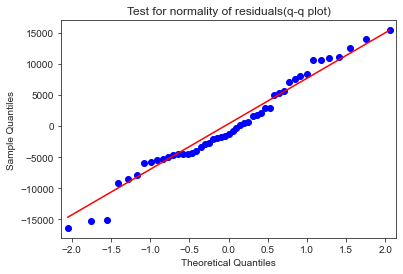

In [29]:
import statsmodels.api as sm
qqplot=sm.qqplot(res,line="q") 
plt.title("Test for normality of residuals(q-q plot)")
plt.show()


In [30]:
list(np.where(m1.resid<-15000))

[array([14, 15, 48])]

# residual plot for homosceasity

In [31]:
def get_Stardardized_values(vals):
    return(vals - vals.mean())/(vals.std())

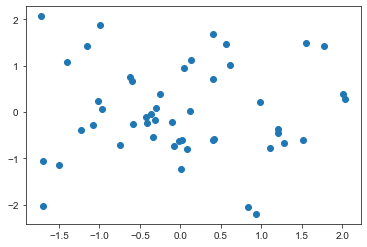

In [32]:
plt.scatter(get_Stardardized_values(m1.fittedvalues),
            get_Stardardized_values(m1.resid))

# residual vs Regressor

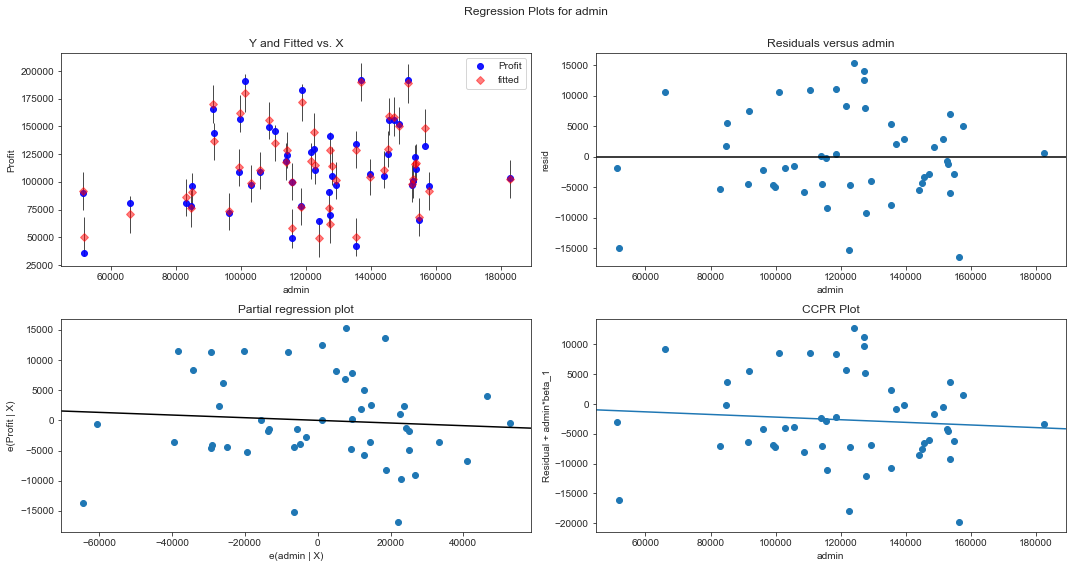

In [33]:
fig= plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(m1,'admin',fig=fig)
plt.show()


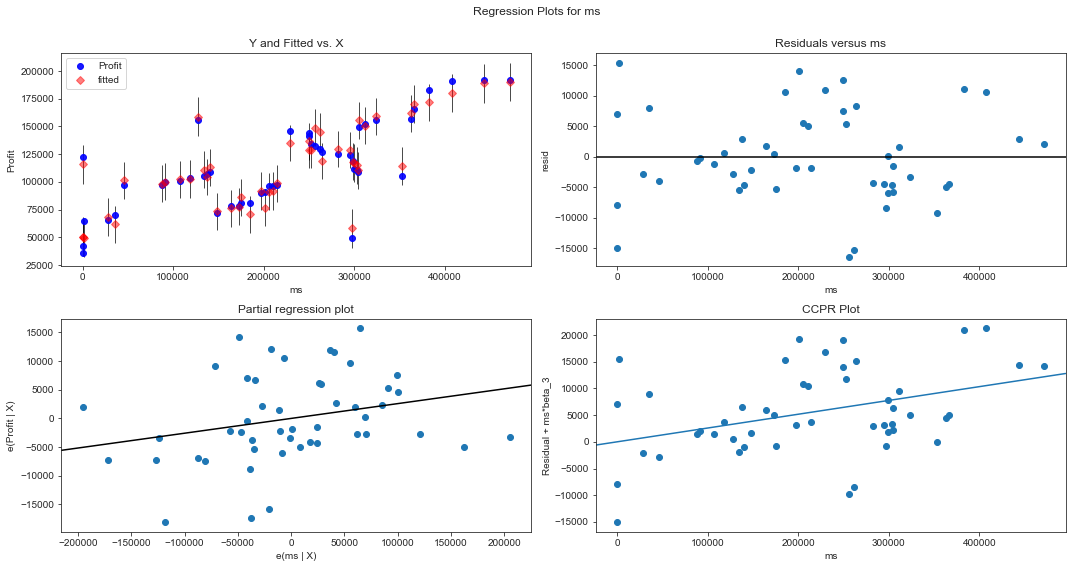

In [34]:
fig= plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(m1,'ms',fig=fig)
plt.show()


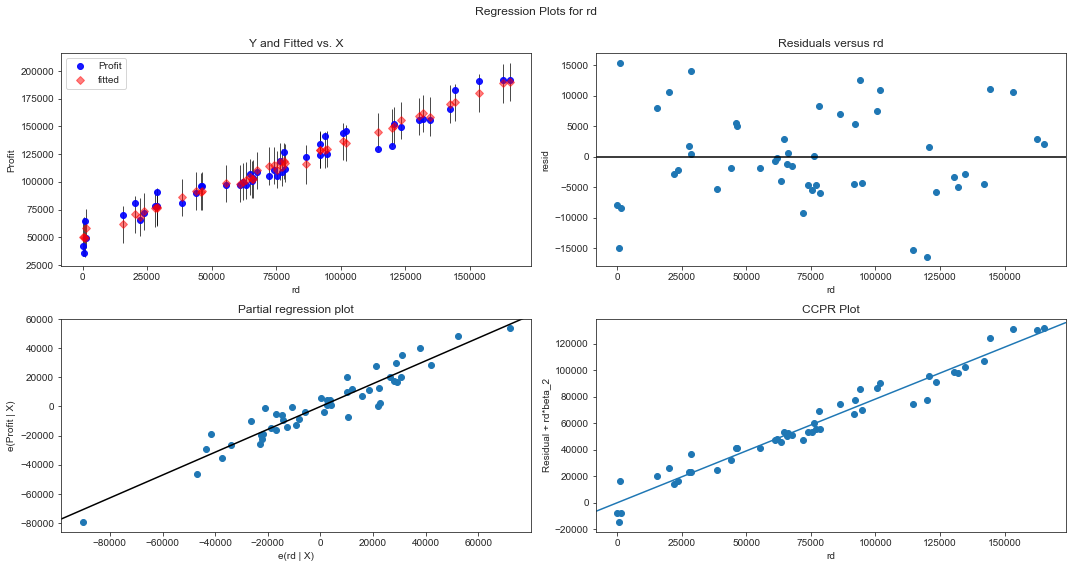

In [35]:
fig= plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(m1,'rd',fig=fig)
plt.show()


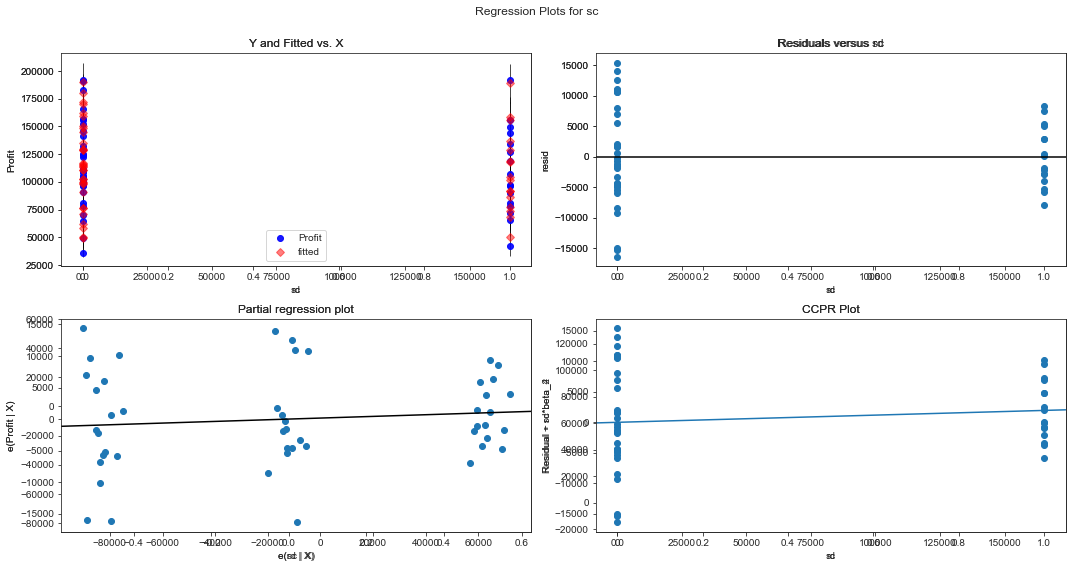

In [36]:
sm.graphics.plot_regress_exog(m1,"sc",fig=fig)

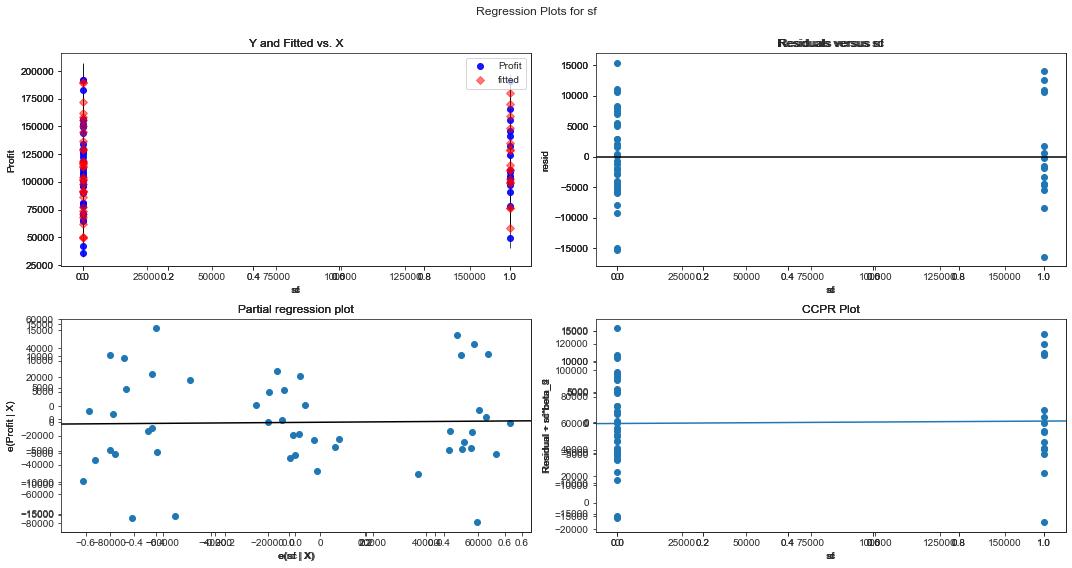

In [37]:
sm.graphics.plot_regress_exog(m1,"sf",fig=fig)

# model deletion diagnostic

In [38]:
from statsmodels.graphics.regressionplots import influence_plot
model_influence = m1.get_influence()
(c, _)= model_influence.cooks_distance


In [39]:
c

array([3.03867206e-03, 6.34213501e-03, 6.10907745e-02, 4.89969621e-02,
       1.08296207e-02, 9.96640531e-03, 7.18257664e-03, 3.43906612e-03,
       7.71896400e-04, 1.16791482e-02, 3.50252773e-02, 2.11128062e-02,
       3.19794651e-02, 6.51681649e-03, 9.52677666e-02, 5.59931284e-02,
       1.59297138e-02, 5.24377171e-03, 4.27707492e-03, 4.50057058e-02,
       5.55348982e-06, 1.67935282e-02, 5.26498586e-03, 6.49142710e-04,
       7.10541515e-03, 1.94064299e-03, 9.56819087e-03, 4.61390479e-02,
       3.35515812e-04, 4.81929683e-04, 2.77054838e-05, 1.99386901e-04,
       6.44240628e-03, 7.58291881e-04, 1.32227858e-02, 1.00900380e-02,
       7.27039884e-02, 2.85158478e-03, 6.73063867e-02, 9.56592291e-03,
       6.78841259e-05, 1.20050726e-03, 1.37273222e-03, 2.39875939e-02,
       4.04204676e-03, 1.10116060e-01, 9.62426496e-02, 2.92982414e-02,
       2.84116205e-01])

Text(0, 0.5, 'cooks distance')

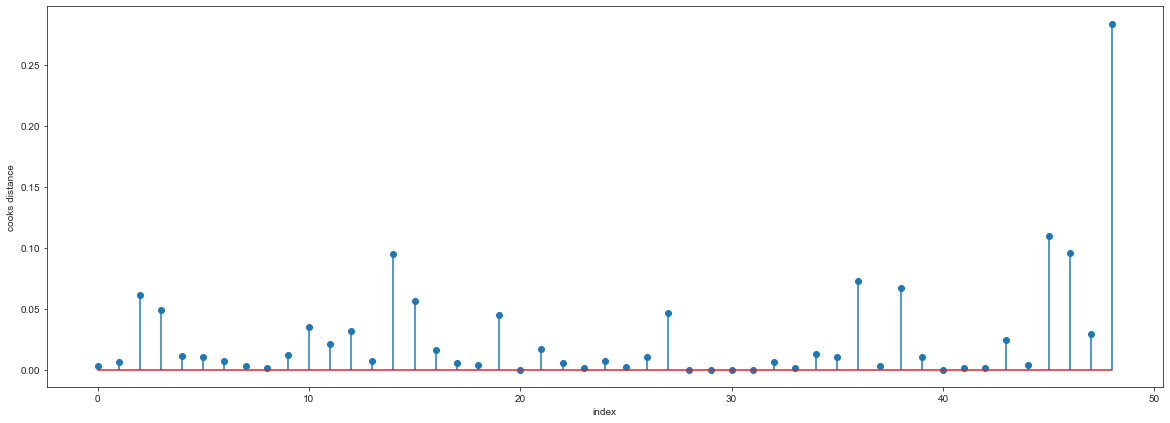

In [40]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df2)),np.round(c,3))
plt.xlabel("index")
plt.ylabel("cooks distance")


In [41]:
np.argmax(c),np.max(c)

(48, 0.28411620500588586)

In [42]:
new_data=df2.drop(df2.index[[48]],axis=0).reset_index()

In [43]:
new_data.head()

,index,rd,admin,ms,Profit,sc,sf
0,0,165349.20,136897.80,471784.10,192261.83,0,0
1,1,162597.70,151377.59,443898.53,191792.06,1,0
2,2,153441.51,101145.55,407934.54,191050.39,0,1
3,3,144372.41,118671.85,383199.62,182901.99,0,0
4,4,142107.34,91391.77,366168.42,166187.94,0,1


In [44]:
data2=new_data.copy()
data2.head()


,index,rd,admin,ms,Profit,sc,sf
0,0,165349.20,136897.80,471784.10,192261.83,0,0
1,1,162597.70,151377.59,443898.53,191792.06,1,0
2,2,153441.51,101145.55,407934.54,191050.39,0,1
3,3,144372.41,118671.85,383199.62,182901.99,0,0
4,4,142107.34,91391.77,366168.42,166187.94,0,1


In [45]:
final_m=smf.ols("Profit~rd+admin+ms+sc+sf",data=data2).fit()
final_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     217.6
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           7.02e-29
Time:                        16:43:10   Log-Likelihood:                -493.23
No. Observations:                  48   AIC:                             998.5
Df Residuals:                      42   BIC:                             1010.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.872e+04   6363.927      9.228      0.000    4.59e+04    7.16e+04
rd             0.7888      0.037     21.160      0.000       0.714       0.864
admin         -0.0621      0.045     -1.381      0.174      -0.153       0.029
ms             0.0179      0.014      1.275      0.209      -0.010       0.046
sc           665.7875   2678.779      0.249      0.805   -4740.208    6071.783
sf          -484.4021   2681.751     -0.181      0.858   -5896.395    4927.591
==============================================================================
Omnibus:                        0.267   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.875   Jarque-Bera (JB):                0.453
Skew:                           0.108   Prob(JB):                        0.797
Kurtosis:                       2.576   Cond. No.                     1.69e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
final_m.rsquared,final_m.aic

(0.9628371102993712, 998.4621953724801)

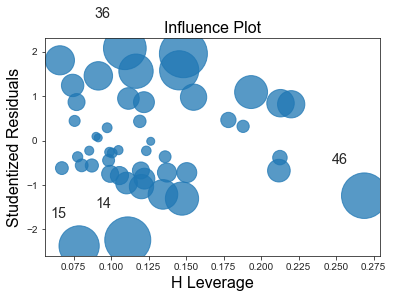

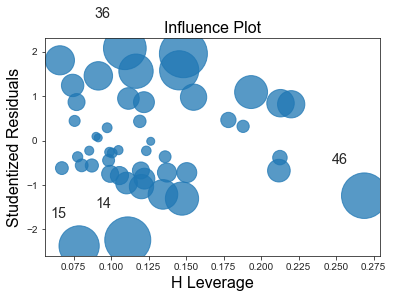

In [47]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(final_m)

# prediction for new data

In [48]:
new_dataa=pd.DataFrame({'rd':162597.7,'admin':151377.59,'ms':443898.53,"sc":1,"sf":0},index=[1])

In [49]:
new_dataa

,rd,admin,ms,sc,sf
1,162597.7,151377.59,443898.53,1,0


In [50]:
pred_y=final_m.predict(new_dataa)

In [51]:
pred_y

1    186183.370112
dtype: float64

In [52]:
data2["predicted"] = final_m.fittedvalues
data2["erro"] = data2["Profit"]-data2["predicted"]
data2.head()

,index,rd,admin,ms,Profit,sc,sf,predicted,erro
0,0,165349.20,136897.80,471784.10,192261.83,0,0,189087.074698,3174.755302
1,1,162597.70,151377.59,443898.53,191792.06,1,0,186183.370112,5608.689888
2,2,153441.51,101145.55,407934.54,191050.39,0,1,180288.581217,10761.808783
3,3,144372.41,118671.85,383199.62,182901.99,0,0,172087.545967,10814.444033
4,4,142107.34,91391.77,366168.42,166187.94,0,1,171206.768166,-5018.828166
